# Проведем анализ базы вакансий из API HH.ru. Выявим различия в предлагаемых вакансиях для Аналитиков данных и специалистов по Data Science.

#### Задачи проекта:
Предобработка данных.
Исследовательский анализ данных.
Определение доли грейдов Junior, Junior+, Middle, Senior среди вакансий Аналитик данных и Специалист по Data Science.
Определение наиболее желаемых кандидатов на вакансии Аналитик данных и Специалист по Data Science по следующим параметрам: самые важные hard-skils, самые важные soft-skils. Отдельно  для грейдов Junior, Junior+, Middle, Senior.
Определение типичного места работы для Аналитика данных и специалист по Data Science по следующим параметрам: ТОП-работодателей, зарплата, тип занятости, график работы. Отдельно для грейдов Junior, Junior+, Middle, Senior.
Расчет помесячной динамики количества вакансий для Аналитика данных и специалиста по Data Science.Отдельно  для грейдов Junior, Junior+, Middle, Senior.
Формулирование выводов.


## 1. Загрузим данные и изучим общую информацию.

Импортируем необходимые библиотеки и прочитаем файлы vacancies_ds.xlsx и vacancies_da (2).xlsx.

In [2508]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
from plotly import graph_objects as go

In [2509]:
data_science = pd.read_excel('file:///Users/tatanafomina/Downloads/vacancies_ds.xlsx')
database_analyst = pd.read_excel('file:///Users/tatanafomina/Downloads/vacancies_da (2).xlsx')

Получим информацию о датафрейме data_science, проверим на наличие дубликатов.

In [2510]:
display(data_science.info())
data_science.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662 entries, 0 to 661
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                662 non-null    int64         
 1   name                              662 non-null    object        
 2   published_at                      662 non-null    datetime64[ns]
 3   alternate_url                     662 non-null    object        
 4   type                              662 non-null    object        
 5   employer                          662 non-null    object        
 6   department                        270 non-null    object        
 7   area                              662 non-null    object        
 8   experience                        662 non-null    object        
 9   key_skills                        662 non-null    object        
 10  schedule                          662 non-null    

None

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
0,67411146,"Ведущий Data Scientist, Ранжирование поиска",2024-04-02 11:20:17,https://hh.ru/vacancy/67411146,Открытая,Ozon,Ozon Информационные технологии,Москва,Middle (3-6 years),"['IT', 'Разработка поисковых технологий', 'dat...",Удаленная работа,Полная занятость,у нас петабайты реальных логов событий пользов...,петабайт реальный лог событие пользователь воз...,NaN,NaN,ЗП не указана,"Python, data science, Разработка поисковых тех...",NaN,NaN
1,78465611,Управляющий директор \ Data Scientist (Сопрово...,2024-04-27 10:10:12,https://hh.ru/vacancy/78465611,Открытая,Банк ВТБ (ПАО),"ПАО ВТБ, Технологический блок",Москва,Middle (3-6 years),"['Оценка рисков', 'Управление рисками', 'MS Po...",Полный день,Полная занятость,наша команда контроля и управления моделями яв...,наш команда контроль управление модель являтьс...,NaN,NaN,ЗП не указана,"Оценка рисков, MS PowerPoint, Статистический а...",NaN,NaN
2,81857265,Associate Professor - Data Science&AI (english),2024-04-08 16:28:05,https://hh.ru/vacancy/81857265,Открытая,Университет Иннополис,NaN,Санкт-Петербург,Middle (3-6 years),"['Machine Learning', 'Public Speaking', 'Writi...",Полный день,Полная занятость,the faculty of computer science and engineerin...,the faculty of computer science and engineerin...,NaN,NaN,ЗП не указана,"Information Technology, Fluent English, Resear...",Юнит-экономика,NaN
3,81857296,Assistant Professor - Data Science&AI (english),2024-04-08 16:28:05,https://hh.ru/vacancy/81857296,Открытая,Университет Иннополис,NaN,Москва,Junior+ (1-3 years),"['Machine Learning', 'Public Speaking', 'Презе...",Полный день,Полная занятость,the faculty of computer science and engineerin...,the faculty of computer science and engineerin...,NaN,NaN,ЗП не указана,"Information Technology, Fluent English, Resear...",Юнит-экономика,Презентация результатов
4,81857358,Assistant Professor - Data Science&AI (english),2024-04-08 16:28:05,https://hh.ru/vacancy/81857358,Открытая,Университет Иннополис,NaN,Санкт-Петербург,Junior+ (1-3 years),"['Machine Learning', 'Public Speaking', 'Презе...",Полный день,Полная занятость,the faculty of computer science and engineerin...,the faculty of computer science and engineerin...,NaN,NaN,ЗП не указана,"Information Technology, Fluent English, Resear...",Юнит-экономика,Презентация результатов


In [2511]:
data_science.describe(include = "all")

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
count,6.620000e+02,662,662,662,662,662,270,662,662,662,662,662,662,662,53.000000,56.000000,662,351,308,194
unique,NaN,383,NaN,662,1,244,46,23,4,306,4,4,564,559,NaN,NaN,5,271,7,19
top,NaN,Data Scientist,NaN,https://hh.ru/vacancy/67411146,Открытая,СБЕР,Сбер для экспертов,Москва,Middle (3-6 years),[],Полный день,Полная занятость,приглашаем в ml команду специалистов в области...,приглашать ml команда специалист область класс...,NaN,NaN,ЗП не указана,"Python, SQL",Pandas,Документация
freq,NaN,91,NaN,1,662,132,95,513,324,118,508,646,6,6,NaN,NaN,606,7,208,88
mean,9.509469e+07,NaN,2024-04-06 22:12:30.661631744,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,166386.792453,265431.250000,NaN,NaN,NaN,NaN
min,6.741115e+07,NaN,2024-02-29 15:01:35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25000.000000,30000.000000,NaN,NaN,NaN,NaN
25%,9.441082e+07,NaN,2024-03-26 00:49:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110000.000000,200000.000000,NaN,NaN,NaN,NaN
50%,9.546403e+07,NaN,2024-04-09 13:37:07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,150000.000000,300000.000000,NaN,NaN,NaN,NaN
75%,9.681181e+07,NaN,2024-04-22 09:43:16.249999872,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200000.000000,350000.000000,NaN,NaN,NaN,NaN
max,9.813507e+07,NaN,2024-04-30 11:41:03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,350000.000000,550000.000000,NaN,NaN,NaN,NaN


In [2512]:
data_science.duplicated().sum()

0

Получим информацию о датафрейме database_analyst, проверим на наличие дубликатов.

In [2513]:
display(database_analyst.info())
database_analyst.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                310 non-null    int64         
 1   name                              310 non-null    object        
 2   published_at                      310 non-null    datetime64[ns]
 3   alternate_url                     310 non-null    object        
 4   type                              310 non-null    object        
 5   employer                          310 non-null    object        
 6   department                        92 non-null     object        
 7   area                              310 non-null    object        
 8   experience                        310 non-null    object        
 9   key_skills                        310 non-null    object        
 10  schedule                          310 non-null    

None

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
0,82978778,Data analyst,2024-04-09 10:29:02,https://hh.ru/vacancy/82978778,Открытая,Телеком биржа,NaN,Москва,Junior+ (1-3 years),"['HTTP', 'Pandas', 'Linux', 'Git', 'Clickhouse...",Полный день,Полная занятость,"кто мы: servicepipe - команда айтишников, кото...",servicepipe команда айтишник работать рынок иб...,NaN,NaN,ЗП не указана,"SQL, Математическая статистика, Linux, Clickho...",Pandas,NaN
1,85053195,System analyst DWH / Data Analyst,2024-04-08 09:37:50,https://hh.ru/vacancy/85053195,Открытая,Axenix (ранее Accenture),NaN,Краснодар,Junior+ (1-3 years),"['DWH', 'Документация', 'Витрины данных', 'Inf...",Удаленная работа,Полная занятость,компания axenix (ранее accenture) продолжает р...,компания axenix ранее accenture продолжать раб...,NaN,NaN,ЗП не указана,"SQL, DWH, Teradata, Hadoop, Airflow, Greenplum...",NaN,Документация
2,85053196,System analyst DWH / Data Analyst,2024-04-08 09:37:50,https://hh.ru/vacancy/85053196,Открытая,Axenix (ранее Accenture),NaN,Ростов-на-Дону,Junior+ (1-3 years),"['DWH', 'Документация', 'Витрины данных', 'Gre...",Удаленная работа,Полная занятость,компания axenix (ранее accenture) продолжает р...,компания axenix ранее accenture продолжать раб...,NaN,NaN,ЗП не указана,"SQL, DWH, Teradata, Hadoop, Airflow, Greenplum...",NaN,Документация
3,86081569,Data analyst / Аналитик данных,2024-04-27 23:34:50,https://hh.ru/vacancy/86081569,Открытая,IQnergy,NaN,Москва,Middle (3-6 years),"['Pandas', 'Анализ данных']",Полный день,Полная занятость,за последние 2 года мы (iqnergy) выросли в 5 р...,последний 2 год iqnergy вырастать 5 помогать o...,NaN,NaN,ЗП не указана,Анализ данных,Pandas,NaN
4,87407185,"Senior Data Analyst ""Growth""",2024-04-02 17:03:10,https://hh.ru/vacancy/87407185,Открытая,Okko,NaN,Санкт-Петербург,Middle (3-6 years),"['A/B тесты', 'confluence', 'SQL', 'Python']",Полный день,Полная занятость,"обязанности: аналитика привлечения, лояльност...",обязанность аналитика привлечение лояльность о...,NaN,NaN,ЗП не указана,"Python, SQL, A/B тесты",confluence,NaN


In [2514]:
database_analyst.describe(include = "all")

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
count,3.100000e+02,310,310,310,310,310,92,310,310,310,310,310,310,310,28.000000,25.000000,310,187,112,86
unique,NaN,176,NaN,310,1,159,15,19,4,177,4,2,271,268,NaN,NaN,5,154,5,16
top,NaN,Data Analyst,NaN,https://hh.ru/vacancy/82978778,Открытая,СБЕР,Сбер для экспертов,Москва,Junior+ (1-3 years),[],Полный день,Полная занятость,приглашаем в ml команду специалистов в области...,приглашать ml команда специалист область класс...,NaN,NaN,ЗП не указана,"SQL, Python",Pandas,Документация
freq,NaN,61,NaN,1,310,67,51,240,178,61,236,308,6,6,NaN,NaN,285,5,72,29
mean,9.525311e+07,NaN,2024-04-10 08:37:02.248387072,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,163837.500000,250528.000000,NaN,NaN,NaN,NaN
min,8.297878e+07,NaN,2024-03-06 08:13:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60000.000000,90000.000000,NaN,NaN,NaN,NaN
25%,9.429780e+07,NaN,2024-03-28 20:27:22.249999872,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,117500.000000,150000.000000,NaN,NaN,NaN,NaN
50%,9.563857e+07,NaN,2024-04-14 11:46:01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,150000.000000,218400.000000,NaN,NaN,NaN,NaN
75%,9.700819e+07,NaN,2024-04-22 18:49:14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,187000.000000,300000.000000,NaN,NaN,NaN,NaN
max,9.814129e+07,NaN,2024-04-30 12:51:55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,350000.000000,495550.000000,NaN,NaN,NaN,NaN


In [2515]:
database_analyst.duplicated().sum() 

0

Загружены данные и библиотеки, изучена информация о датафрейме. Можно переходить  к предобработке данных и выбору столбцов для дальнейшего анализа.

## 2. Выполним предобработку данных.

Удалим пробелы в строках.

In [2516]:
for column in data_science.columns:
    try:
        data_science[column] = data_science[column].str.strip() 
    except AttributeError:
        pass 

In [2517]:
for column in database_analyst.columns:
    try:
        database_analyst[column] = database_analyst[column].str.strip() 
    except AttributeError:
        pass 

В столбцах key_skills и  key_skills_from_key_skills_field приведем слова к нижнему регистру.

In [2518]:
data_science['key_skills'] = data_science['key_skills'].str.lower()
#data_science['key_skills']
data_science['key_skills_from_key_skills_field'] = data_science['key_skills_from_key_skills_field'].str.lower()
#data_science['key_skills_from_key_skills_field']
database_analyst['key_skills'] = database_analyst['key_skills'].str.lower()
#data_science['key_skills']


Мы ознакомились с данными и провели предобработку.
Для  решения поставленных  задач будем использовать столбцы id, published_at, employer, experience, key_skills	schedule, employment, description, salary_bin,	key_skills_from_key_skills_field,	hard_skills_from_description, soft_skills_from_description.

## 3.  Исследовательский анализ данных.

### Определение доли грейдов Junior, Junior+, Middle, Senior среди вакансий Аналитик данных и Специалист по Data Science

In [2519]:
count_dс = data_science.groupby('experience')['experience'].count()
general_count_dс = data_science['experience'].count()
table_count_dс = round(count_dс / general_count_dс  * 100)

count_da = database_analyst.groupby('experience')['experience'].count()
general_count_da = database_analyst['experience'].count()
table_count_da = round(count_da /general_count_da *100)

result = pd.concat([table_count_da, table_count_dс], axis=1)
result.columns = ['Аналитик данных', 'Специалист по Data Science']

#result = result.sort_values(by='Специалист по Data Science')
#display(result)
# Приводим числовые значения к int
result['Аналитик данных'] = result['Аналитик данных'].astype(int)
result['Специалист по Data Science'] = result['Специалист по Data Science'].astype(int)

# Добавляем знак %
#result[['Аналитик данных', 'Специалист по Data Science']] = result[['Аналитик данных', 'Специалист по Data Science']].astype(str) + '%'

display('Доли грейдов Junior, Junior+, Middle, Senior среди вакансий Аналитик данных и Специалист по Data Science в %')
(result
 .T
 .style
 .background_gradient(cmap='Blues', axis=1)
)

'Доли грейдов Junior, Junior+, Middle, Senior среди вакансий Аналитик данных и Специалист по Data Science в %'

experience,Junior (no experince),Junior+ (1-3 years),Middle (3-6 years),Senior (6+ years)
Аналитик данных,3,57,39,1
Специалист по Data Science,4,44,49,3


#### Наибольшее количество вакансий для Middle и Junior с опытом от года как для аналитиков данных, так и для специалистов по Data Science.

### Определение наиболее желаемых кандидатов на вакансии Аналитик данных и Специалист по Data Science по следующим параметрам: самые важные hard-skils, самые важные soft-skils.Ответ отдельно  для грейдов Junior, Junior+, Middle, Senior.

Для поиска самых важных hard-skils и soft-skils создадим два списка из часто встречающихся скилов из столбцов key_skills.

In [2520]:
#очистка значений от лишних символов
skills_for_science['key_skills'] = skills_for_science['key_skills'].str.replace("'", "")
#посчет значений
unique_skills_for_science = skills_for_science['key_skills'].str.split(',').explode().value_counts().head(50)
unique_skills_for_science


key_skills
 python                          246
[pandas                          122
[]                               118
 sql]                            110
[machine learning                 77
 pandas                           69
 ml                               69
[pandas]                          65
 data science                     61
 sql                              61
 математическая статистика        43
 big data                         41
 pytorch]                         39
 документация                     38
 коммуникация                     37
 python]                          37
 git                              33
 анализ данных                    33
 nlp                              33
 spark                            32
 машинное обучение                31
[документация                     30
 data analysis                    30
 numpy                            27
 hadoop                           27
[документация]                    26
 linux                     

In [2521]:
#очистка значений от лишних символов
skills_for_analyst['key_skills'] = skills_for_analyst['key_skills'].str.replace("'", "")
#посчет значений
unique_skills_for_analyst = skills_for_analyst['key_skills'].str.split(',').explode().value_counts().head(50)
unique_skills_for_analyst

key_skills
 python                                 97
 sql                                    88
 sql]                                   61
[]                                      61
[pandas                                 46
 анализ данных                          45
 data analysis                          31
 аналитическое мышление                 31
 python]                                29
 power bi]                              28
[data analysis                          26
 big data                               25
 аналитика                              24
 документация                           23
 коммуникация                           21
[pandas]                                21
 postgresql                             21
 pandas                                 21
 математическая статистика              20
 confluence                             19
 tableau                                18
 работа с базами данных                 15
 a/b тесты                              14


In [2522]:
#список soft skils
catalog_soft_skils = ['коммуникация', 'аналитическое мышление', 'проактивность', 'принятие решений', 'переговоры',                
'решение проблем', 'креативность', 'критическое мышление', 'внимание к деталям', 'документация', 
'презентация результатов', 'адаптивность', 'работа в команде', 'лидерство', 'письменная коммуникация',
'работа с большим объемом информации']
#список hard skils
catalog_hard_skils = ['python', 'sql', 'pandas', 'data analysis', 'power bi', 'ml', 'data science',
'big data', 'аналитика', 'postgresql', 'математическая статистика',
'confluence', 'tableau ', 'работа с базами данных', 'A/B тесты', 'machine learning', 'pytorch', 'nlp'
'ms excel', 'аналитические исследования', 'базы данных', 'ms sql', 'spark', 'airflow','статистический анализ',
'git', 'математический анализ', 'юнит-экономика', 'анализ данных', 'vba', 'сбор и анализ информации', 'numpy', 
'clickhouse', 'английский язык', 'google analytics', 'ms power bi', 'greenplum', 'машинное обучение', 'hadoop', 
'hadoop', 'математическое моделирование', 'machine learning', 'docker', 'tensorflow', 'postgresql', ' mlflow',
'computer vision', 'deep learning', 'sklearn']


In [2523]:
skills_science =  data_science[['experience',  'key_skills', 'soft_skills_from_description', 'hard_skills_from_description']].copy()
skills_analyst = database_analyst[['experience', 'key_skills', 'soft_skills_from_description', 'hard_skills_from_description']].copy()

skills_science['key_skills'] = skills_science['key_skills'].str.lower()
skills_analyst['key_skills'] = skills_analyst['key_skills'].str.lower()


Посмотрим наличие популярных  hard-skils и soft-skils и добавим новые столбцы с данными. 

In [2524]:
#поиск скилов в столбце key_skills
def check_soft_skills(row):
    key_skills = row['key_skills']
    for skill in catalog_soft_skils:
        if skill in key_skills:
            return skill
    return ''

def check_hard_skills(row):
    key_skills = row['key_skills']
    for skill in catalog_hard_skils:
        if skill in key_skills:
            return skill
    return ''

# Добавление нового столбца с найденными объектами
skills_science['science_soft_skills'] = skills_science.apply(check_soft_skills, axis=1)
skills_science['science_hard_skills'] = skills_science.apply(check_hard_skills, axis=1)


In [2525]:
#поиск скилов в столбце key_skills
def check_soft_skills(row):
    key_skills = row['key_skills']
    for skill in catalog_soft_skils:
        if skill in key_skills:
            return skill
    return ''

def check_hard_skills(row):
    key_skills = row['key_skills']
    for skill in catalog_hard_skils:
        if skill in key_skills:
            return skill
    return ''


skills_analyst['catalog_soft_skils'] = skills_analyst.apply(check_soft_skills, axis=1)
skills_analyst['catalog_hard_skils'] = skills_analyst.apply(check_hard_skills, axis=1)


Сравним количество пропусков в столбцах soft_skills_from_description, hard_skills_from_description и новых catalog_soft_skils, catalog_hard_skils, science_soft_skills, science_hard_skills

In [2526]:
display('% пропусков скилов для аналитиков данных', round(skills_analyst.isnull().sum () / len(skills_analyst)  * 100))
display('% пропусков скилов для Data Science ', round(skills_science.isnull().sum ( )/ len(skills_science)  * 100))

'% пропусков скилов для аналитиков данных'

experience                       0.0
key_skills                       0.0
soft_skills_from_description    72.0
hard_skills_from_description    64.0
catalog_soft_skils               0.0
catalog_hard_skils               0.0
dtype: float64

'% пропусков скилов для Data Science '

experience                       0.0
key_skills                       0.0
soft_skills_from_description    71.0
hard_skills_from_description    53.0
science_soft_skills              0.0
science_hard_skills              0.0
dtype: float64

Заманим пробелы на nan в новых полученных столбцах.

In [2527]:
skills_analyst = skills_analyst.apply(lambda x: x.replace(r'^\s*$', np.nan, regex=True) if x.dtype == "object" else x)

In [2528]:
skills_science = skills_science.apply(lambda x: x.replace(r'^\s*$', np.nan, regex=True) if x.dtype == "object" else x)

In [2529]:
display('% пропусков в столбцах  скилов для аналитиков данных', round(skills_analyst.isnull().sum () / len(skills_analyst)  * 100))
display('% пропусков в столбцах скилов для Data Science ', round(skills_science.isnull().sum ( )/ len(skills_science)  * 100))

'% пропусков в столбцах  скилов для аналитиков данных'

experience                       0.0
key_skills                       0.0
soft_skills_from_description    72.0
hard_skills_from_description    64.0
catalog_soft_skils              63.0
catalog_hard_skils              29.0
dtype: float64

'% пропусков в столбцах скилов для Data Science '

experience                       0.0
key_skills                       0.0
soft_skills_from_description    71.0
hard_skills_from_description    53.0
science_soft_skills             67.0
science_hard_skills             26.0
dtype: float64

Для дальнейшего анализа будем использовать catalog_soft_skils, catalog_hard_skils, science_soft_skills, science_hard_skills, так как у них меньше % пропусков.

In [2530]:
skills_analyst.drop(skills_analyst.columns[[1, 2, 3]], axis= 1 , inplace= True)
skills_science.drop(skills_science.columns[[1, 2, 3]], axis= 1 , inplace= True)

In [2531]:
display(skills_analyst)
skills_science

,experience,catalog_soft_skils,catalog_hard_skils
0,Junior+ (1-3 years),NaN,python
1,Junior+ (1-3 years),документация,sql
2,Junior+ (1-3 years),документация,sql
3,Middle (3-6 years),NaN,pandas
4,Middle (3-6 years),NaN,python
...,...,...,...
305,Middle (3-6 years),коммуникация,NaN
306,Middle (3-6 years),документация,python
307,Middle (3-6 years),NaN,python
308,Senior (6+ years),коммуникация,python


,experience,science_soft_skills,science_hard_skills
0,Middle (3-6 years),NaN,python
1,Middle (3-6 years),NaN,sql
2,Middle (3-6 years),NaN,machine learning
3,Junior+ (1-3 years),презентация результатов,machine learning
4,Junior+ (1-3 years),презентация результатов,machine learning
...,...,...,...
657,Middle (3-6 years),NaN,юнит-экономика
658,Junior (no experince),NaN,NaN
659,Junior+ (1-3 years),NaN,NaN
660,Junior+ (1-3 years),NaN,NaN


Определим наиболее популярные soft skills и hard skills для каждого грейда.

In [2532]:
skils_for_science_Junior_ne = skills_science.query('experience == "Junior (no experince)"')['science_soft_skills'].value_counts().reset_index()
skils_for_analyst_Junior_ne = skills_analyst.query('experience == "Junior (no experince)"')['catalog_soft_skils'].value_counts().reset_index()

skils_soft_AS_Junior_ne = pd.concat([skils_for_science_Junior_ne, skils_for_analyst_Junior_ne], axis=1)
skils_soft_AS_Junior_ne.columns = ['soft skills специалиста по Data Science', 'count', 'soft skills аналитиков данных', 'count1']
skils_soft_AS_Junior_ne.drop(['count', 'count1'], axis= 1 , inplace= True)
#skils_soft_AS_Junior_ne

In [2533]:
skils_for_science_Junior = skills_science.query('experience == "Junior+ (1-3 years)"')['science_soft_skills'].value_counts().reset_index()
skils_for_analyst_Junior = skills_analyst.query('experience == "Junior+ (1-3 years)"')['catalog_soft_skils'].value_counts().reset_index()

skils_soft_AS_Junior = pd.concat([skils_for_science_Junior, skils_for_analyst_Junior], axis=1).head(3)
skils_soft_AS_Junior.columns = ['soft skills специалиста по Data Science', 'count', 'soft skills аналитиков данных', 'count1']
skils_soft_AS_Junior.drop(['count', 'count1'], axis= 1 , inplace= True)
#skils_soft_AS_Junior

In [2534]:
skils_for_science_Middle = skills_science.query('experience == "Middle (3-6 years)"')['science_soft_skills'].value_counts().reset_index()
skils_for_analyst_Middle = skills_analyst.query('experience == "Middle (3-6 years)"')['catalog_soft_skils'].value_counts().reset_index()

skils_soft_AS_Middle = pd.concat([skils_for_science_Middle, skils_for_analyst_Middle], axis=1).head(3)
skils_soft_AS_Middle.columns = ['soft skills специалиста по Data Science', 'count', 'soft skills аналитиков данных', 'count1']
skils_soft_AS_Middle.drop(['count', 'count1'], axis= 1 , inplace= True)
#skils_soft_AS_Middle

In [2535]:
skils_for_science_Senior = skills_science.query('experience == "Senior (6+ years)"')['science_soft_skills'].value_counts().reset_index()
skils_for_analyst_Senior = skills_analyst.query('experience == "Senior (6+ years)"')['catalog_soft_skils'].value_counts().reset_index()

skils_soft_AS_Senior = pd.concat([skils_for_science_Senior, skils_for_analyst_Senior], axis=1).head(3)
skils_soft_AS_Senior.columns = ['soft skills специалиста по Data Science', 'count', 'soft skills аналитиков данных', 'count1']
skils_soft_AS_Senior.drop(['count', 'count1'], axis= 1 , inplace= True)
#skils_soft_AS_Senior

In [2536]:
display('SOFT SKILS доя грейда Junior')
display(skils_soft_AS_Junior_ne)
display('SOFT SKILS доя грейда Junior+')
display(skils_soft_AS_Junior)
display('SOFT SKILS доя грейда Middle')
display(skils_soft_AS_Middle)
display('SOFT SKILS доя грейда Senior')
display(skils_soft_AS_Senior)

'SOFT SKILS доя грейда Junior'

,soft skills специалиста по Data Science,soft skills аналитиков данных
0,документация,аналитическое мышление
1,аналитическое мышление,коммуникация
2,презентация результатов,NaN


'SOFT SKILS доя грейда Junior+'

,soft skills специалиста по Data Science,soft skills аналитиков данных
0,документация,аналитическое мышление
1,коммуникация,коммуникация
2,аналитическое мышление,документация


'SOFT SKILS доя грейда Middle'

,soft skills специалиста по Data Science,soft skills аналитиков данных
0,документация,коммуникация
1,коммуникация,документация
2,аналитическое мышление,аналитическое мышление


'SOFT SKILS доя грейда Senior'

,soft skills специалиста по Data Science,soft skills аналитиков данных
0,коммуникация,документация
1,документация,аналитическое мышление
2,адаптивность,коммуникация


In [2537]:
hard_skils_for_science_Junior_ne = skills_science.query('experience == "Junior (no experince)"')['science_hard_skills'].value_counts().reset_index()
hard_skils_for_analyst_Junior_ne = skills_analyst.query('experience == "Junior (no experince)"')['catalog_hard_skils'].value_counts().reset_index()

hard_skils_AS_Junior_ne = pd.concat([hard_skils_for_science_Junior_ne, hard_skils_for_analyst_Junior_ne], axis=1)
hard_skils_AS_Junior_ne.columns = ['hard skills специалиста по Data Science', 'count', 'hard skills аналитиков данных', 'count1']
hard_skils_AS_Junior_ne.drop(['count', 'count1'], axis= 1 , inplace= True)
hard_skils_AS_Junior_ne.fillna('', inplace= True)
#hard_skils_AS_Junior_ne

In [2538]:
hard_skils_for_science_Junior = skills_science.query('experience == "Junior+ (1-3 years)"')['science_hard_skills'].value_counts().reset_index()
hard_skils_for_analyst_Junior = skills_analyst.query('experience == "Junior+ (1-3 years)"')['catalog_hard_skils'].value_counts().reset_index()

hard_skils_AS_Junior = pd.concat([hard_skils_for_science_Junior_ne, hard_skils_for_analyst_Junior_ne], axis=1).head(3)
hard_skils_AS_Junior.columns = ['hard skills специалиста по Data Science', 'count', 'hard skills аналитиков данных', 'count1']
hard_skils_AS_Junior.drop(['count', 'count1'], axis= 1 , inplace= True)
hard_skils_AS_Junior.fillna('', inplace= True)
#hard_skils_AS_Junior


In [2539]:
hard_skils_for_science_Middle = skills_science.query('experience == "Middle (3-6 years)"')['science_hard_skills'].value_counts().reset_index()
hard_skils_for_analyst_Middle = skills_analyst.query('experience == "Middle (3-6 years)"')['catalog_hard_skils'].value_counts().reset_index()

hard_skils_AS_Middle = pd.concat([hard_skils_for_science_Middle, hard_skils_for_analyst_Middle], axis=1).head(3)
hard_skils_AS_Middle.columns = ['hard skills специалиста по Data Science', 'count', 'hard skills аналитиков данных', 'count1']
hard_skils_AS_Middle.drop(['count', 'count1'], axis= 1 , inplace= True)
hard_skils_AS_Middle.fillna('', inplace= True)
#hard_skils_AS_Middle

In [2540]:
hard_skils_for_science_Senior = skills_science.query('experience == "Senior (6+ years)"')['science_hard_skills'].value_counts().reset_index()
hard_skils_for_analyst_Senior = skills_analyst.query('experience == "Senior (6+ years)"')['catalog_hard_skils'].value_counts().reset_index()

hard_skils_AS_Senior = pd.concat([hard_skils_for_science_Senior, hard_skils_for_analyst_Senior], axis=1).head(3)
hard_skils_AS_Senior.columns = ['hard skills специалиста по Data Science', 'count', 'hard skills аналитиков данных', 'count1']
hard_skils_AS_Senior.drop(['count', 'count1'], axis= 1 , inplace= True)
hard_skils_AS_Senior.fillna('', inplace= True)
#hard_skils_AS_Senior

In [2541]:
display('HARD SKILS доя грейда Junior')
display(hard_skils_AS_Junior_ne)
display('HARD  SKILS доя грейда Junior+')
display(hard_skils_AS_Junior)
display('HARD  SKILS доя грейда Middle')
display(hard_skils_AS_Middle)
display('HARD  SKILS доя грейда Senior')
display(hard_skils_AS_Senior)

'HARD SKILS доя грейда Junior'

,hard skills специалиста по Data Science,hard skills аналитиков данных
0,python,python
1,pandas,
2,machine learning,
3,confluence,
4,big data,


'HARD  SKILS доя грейда Junior+'

,hard skills специалиста по Data Science,hard skills аналитиков данных
0,python,python
1,pandas,
2,machine learning,


'HARD  SKILS доя грейда Middle'

,hard skills специалиста по Data Science,hard skills аналитиков данных
0,python,python
1,pandas,sql
2,юнит-экономика,pandas


'HARD  SKILS доя грейда Senior'

,hard skills специалиста по Data Science,hard skills аналитиков данных
0,python,python
1,pandas,
2,sql,


#### Python самый востребованный HARD  SKIL, самый популярный SOFT SKIL  среди грейдов Junior, Junior+, Middle, Senior   и у аналитиков данных  и специалистов по Data Science  - аналитическое мышление. 

### Определение типичного места работы для Аналитика данных и специалист по Data Science по следующим параметрам: ТОП-работодателей, зарплата, тип занятости. Ответ отдельно  для грейдов Junior, Junior+, Middle, Senior.

Выведем необходимые для анализа данные в отдельные таблицы.

In [2542]:
science =  data_science[["experience", "employer", "schedule", "employment", "salary_bin"]]
analyst =  database_analyst[["experience", "employer", "schedule", "employment", "salary_bin"]]

Найдем топ 10 работодателей для грейдов Junior, Junior+, Middle, Senior.

In [2543]:
analyst_Jun_en = analyst.query('experience == "Junior (no experince)"')['employer'].value_counts().reset_index()
science_Jun_en = science.query('experience == "Junior (no experince)"')['employer'].value_counts().head(10).reset_index()

analyst_Jun_en.columns = ['Аналитик данных', 'count']
science_Jun_en.columns = ['Специалист по Data Science', 'count']

Jun_en = pd.concat([science_Jun_en, analyst_Jun_en], axis=1)
Jun_en.drop('count', axis= 1 , inplace= True )
#display('ТОП 10 работодателей для грейда Junior')
#Jun_en



In [2544]:
analyst_Jun = analyst.query('experience == "Junior+ (1-3 years)"')['employer'].value_counts().head(10).reset_index()
science_Jun = science.query('experience == "Junior+ (1-3 years)"')['employer'].value_counts().head(10).reset_index()

analyst_Jun.columns = ['Аналитик данных', 'count']
science_Jun.columns = ['Специалист по Data Science', 'count']

Jun = pd.concat([science_Jun, analyst_Jun], axis=1)
Jun.drop('count', axis= 1 , inplace= True )
#display('ТОП 10 работодателей для грейда Junior+')
#Jun


In [2545]:
analyst_Middle = analyst.query('experience == "Middle (3-6 years)"')['employer'].value_counts().head(10).reset_index()
science_Middle = science.query('experience == "Middle (3-6 years)"')['employer'].value_counts().head(10).reset_index()

analyst_Middle.columns = ['Аналитик данных', 'count']
science_Middle.columns = ['Специалист по Data Science', 'count']

Middle = pd.concat([science_Middle, analyst_Middle], axis=1)
Middle.drop('count', axis= 1 , inplace= True )
#display('ТОП 10 работодателей для грейда Middle')
#Middle

In [2546]:
analyst_Senior = analyst.query('experience == "Senior (6+ years)"')['employer'].value_counts().reset_index()
science_Senior = science.query('experience == "Senior (6+ years)"')['employer'].value_counts().head(10).reset_index()

analyst_Senior.columns = ['Аналитик данных', 'count']
science_Senior.columns = ['Специалист по Data Science', 'count']

Senior = pd.concat([science_Senior, analyst_Senior], axis=1)
Senior.drop('count', axis= 1 , inplace= True )
#display('ТОП 10 работодателей для грейда Senior')
#Senior



In [2547]:
display('ТОП 10 работодателей для грейда Junior')
display(Jun_en)
display('ТОП 10 работодателей для грейда Junior+')
display(Jun)
display('ТОП 10 работодателей для грейда Middle')
display(Middle)
display('ТОП 10 работодателей для грейда Senior')
display(Senior)


'ТОП 10 работодателей для грейда Junior'

,Специалист по Data Science,Аналитик данных
0,СБЕР,"РЕСО-Гарантия, САО"
1,Ozon,СБЕР
2,Правительство Москвы,DNS Технологии
3,Lamoda Tech,ANCOR
4,Университет Иннополис,Альфа Капитал
5,МТС,Appie.tech
6,Россельхозбанк,Компания CADesign
7,Changellenge,TradingView
8,Headwise LLC,NaN
9,Эр-1,NaN


'ТОП 10 работодателей для грейда Junior+'

,Специалист по Data Science,Аналитик данных
0,СБЕР,СБЕР
1,Ростелеком,МТС
2,Банк ВТБ (ПАО),Центр финансовых технологий
3,Сахалин - Остров Возможностей,ПСБ (ПАО «Промсвязьбанк»)
4,1221Системс,"МАГНИТ, Розничная сеть"
5,Газпромбанк,StudyWorld
6,Samokat.tech,Okko
7,ПКБ,Finstar Financial Group
8,билайн,ЦРТ | Группа компаний
9,ARK,WILDBERRIES


'ТОП 10 работодателей для грейда Middle'

,Специалист по Data Science,Аналитик данных
0,СБЕР,СБЕР
1,Ozon,WILDBERRIES
2,Газпромбанк,«UZUM TECHNOLOGIES».
3,Lamoda Tech,Maxim technology
4,WILDBERRIES,MIGX GmbH
5,Samokat.tech,Playrix
6,ДОМ.РФ,Okko
7,Т1,Звук
8,HeadHunter,АДВ
9,Okko,Сравни


'ТОП 10 работодателей для грейда Senior'

,Специалист по Data Science,Аналитик данных
0,Sape,Леруа Мерлен
1,СБЕР,Reinvent Baltics
2,Aramco Innovations,NaN
3,Fundraise Up,NaN
4,MERLION,NaN
5,Альфа-Банк,NaN
6,Selecty,NaN
7,Мокка,NaN
8,Консалтика,NaN
9,БиАйЭй-Технолоджиз,NaN


ТОП 10 работодателей для грейдов Junior, Junior+, Middle, Senior не однороден по направлениию деятельности.Среди них крупные банки, маркет плэйсы,  рекрутинговые агентства, консалтинговые агенства. 

Посмотрим данные о занятости.

In [2548]:
count_sc =  round(science['employment'].value_counts() / science['employment'].count() * 100)
count_an =  round(analyst['employment'].value_counts() / analyst['employment'].count() * 100)
employment_counts = pd.concat([count_sc, count_an], axis=1).fillna(0)
#display(employment_counts)
employment_counts.columns = ['Специалист по Data Science', 'Аналитик данных']

employment_counts['Аналитик данных'] = employment_counts['Аналитик данных'].astype(int)
employment_counts['Специалист по Data Science'] = employment_counts['Специалист по Data Science'].astype(int)

display('Данные по типам занятости для Аналитика данных и специалиста по Data Science в %')

(employment_counts
 .T
 .style
 #.format("{:.1f}")
 .background_gradient(cmap='Blues', axis=1)
)
 

'Данные по типам занятости для Аналитика данных и специалиста по Data Science в %'

employment,Полная занятость,Стажировка,Частичная занятость,Проектная работа
Специалист по Data Science,98,2,0,0
Аналитик данных,99,0,1,0


98 % вакансий с полной занятостью для Аналитика данных и специалиста по Data Science. Делать разбивку по грейдам необходимости. 

Посморим на данные о графике работы.

In [2549]:
schedule_sc =  round(science['schedule'].value_counts() / science['schedule'].count() * 100)
schedule_an =  round(analyst['schedule'].value_counts() / analyst['schedule'].count() * 100)
schedule_counts = pd.concat([schedule_sc, schedule_an], axis=1).fillna(0)
#display(schedule_counts)
schedule_counts.columns = ['Специалист по Data Science', 'Аналитик данных']

schedule_counts['Аналитик данных'] = schedule_counts['Аналитик данных'].astype(int)
schedule_counts['Специалист по Data Science'] = schedule_counts['Специалист по Data Science'].astype(int)

display('Данные о занатости для Аналитика данных и специалиста по Data Science в %')

(schedule_counts
 .T
 .style
 #.format("{:.1f}")
 .background_gradient(cmap='Blues', axis=1)
)


'Данные о занатости для Аналитика данных и специалиста по Data Science в %'

schedule,Полный день,Удаленная работа,Гибкий график,Сменный график
Специалист по Data Science,77,18,5,0
Аналитик данных,76,20,2,1


Данные о графике работы так же можно не разделять по грейдам.Большая часть работодателей ждет сотрудников на полный рабочий день.

Посмотрим данные по зарплате.

In [2550]:
salary_science =  round(data_science['salary_bin'].value_counts() / science['salary_bin'].count() * 100)
salary_analyst = round(database_analyst['salary_bin'].value_counts() / database_analyst['salary_bin'].count() * 100)

result_salary = pd.concat([salary_science, salary_analyst], axis=1)
result_salary.columns = ['Специалист по Data Science', 'Аналитик данных']

result_salary['Аналитик данных'] = result_salary['Аналитик данных'].astype(int)
result_salary['Специалист по Data Science'] = result_salary['Специалист по Data Science'].astype(int)

display('Данные по зарплате для Аналитика данных и специалиста по Data Science в %')

(result_salary
 .T
 .style
# .format("{:.1f}")
 .background_gradient(cmap='Blues', axis=1)
)

'Данные по зарплате для Аналитика данных и специалиста по Data Science в %'

salary_bin,ЗП не указана,Больше 300 тысяч,От 200 тысяч до 300 тысяч,От 100 тысяч до 200 тысяч,Меньше 100 тысяч
Специалист по Data Science,92,4,2,1,1
Аналитик данных,92,2,4,2,0


Данных о зарплате не хватает для того чтобы сделать выводы.

####  Определим  типичное место работы для Аналитика данных и специалиста по Data Science.Для Junior без опыта и с опытом  работы это банки, маркетплэйсы, рекрутинговые агентства. Для Middle  банки, продуктовые и сервисные IT компании.Для Senior девелоперские компании, банки, продуктовые и сервисные IT компании.И всех их объединяет полная занатость в полный рабочий день.

###  Расчет помесячной динамики количества вакансий для Аналитика данных и специалиста по Data Science. Ответ отдельно  для грейдов Junior, Junior+, Middle, Senior. 

In [2551]:

# Создание маски наличия слова "аналитик" в каждой строке
mask = np.array(['science' in row.lower() for row in database_analyst['name']])

# Выбор строк, удовлетворяющих маске
selected_rows = database_analyst['name'][mask]

# Вывод результатов
for row in selected_rows:
    print(row)
    

Data Analyst (Data Science и клиентская аналитика)


In [2552]:
# Создание маски наличия слова "аналитик" в каждой строке
mask = np.array(['аналитик' in row.lower() for row in data_science['name']])

# Выбор строк, удовлетворяющих маске
selected_rows = data_science['name'][mask]

# Вывод результатов
for row in selected_rows:
    print(row)

Дата аналитик (Data Scientist)
Дата аналитик (Data Scientist)
Аналитик данных (data scientist, data engineer)
Эксперт Группа аналитики и моделирования (Data scientist)
Аналитик Data Science
Дата аналитик (Data Scientist)
Data Scientist / Автоматизация и аналитика корпоративного бизнеса
Дата аналитик (Data Scientist)
Дата аналитик (Data Scientist)
Аналитик данных (Data Scientist)
Аналитик данных (Data Scientist)
Бизнес-аналитик со знанием SQL (удаленно)/Data scientist
Бизнес-аналитик со знанием SQL (удаленно)/Data scientist
Аналитик (Data science)
Аналитик данных / Data Scientist
Data Scientist in Geoscience (Аналитик данных - Геология)
Data Science Lead / Руководитель группы специалистов по машинному обучению и аналитике данных
Аналитик Data Science (NLP, LLM)
Аналитик данных / Data Scientist
Бизнес-аналитик со знанием SQL (удаленно)/Data scientist
Бизнес-аналитик со знанием SQL (удаленно)/Data scientist
Бизнес-аналитик со знанием SQL (удаленно)/Data scientist
Бизнес-аналитик со знание

In [2553]:
science_date =  data_science[["published_at", "id", "experience"]].reset_index()
analyst_date =  database_analyst[["published_at", "id", "experience"]].reset_index()

При изучении данных в science_date[published_at] найдена 1 вакансия размещенная в феврале, удалим ее,чтобы получить корректный результат.

In [2554]:
#science_date[science_date['published_at'] == '2024-02-29 15:01:35']
science_date = science_date.drop(index=133, axis=0)
science_date[science_date['published_at'] == '2024-02-29 15:01:35']


,index,published_at,id,experience


Подсчитаем количество вакансий по месяцам отдельно  для грейдов Junior, Junior+, Middle, Senior.

In [2555]:
def count_vacancies_by_month(data, experience, job_title):
    data_filtered = data.query(f'experience == "{experience}"')
    data_filtered['Месяц'] = pd.to_datetime(data_filtered['published_at']).dt.month
    data_grouped = data_filtered.groupby('Месяц')['id'].count().reset_index()
    data_grouped.columns = ['Месяц', f'Количество вакансий для {job_title}']
    return data_grouped

analyst_junior_ne = count_vacancies_by_month(analyst_date, "Junior (no experince)", "Аналитика данных")
science_junior_ne = count_vacancies_by_month(science_date, "Junior (no experince)", "Data Science")
month_jun = pd.concat([analyst_junior_ne, science_junior_ne], axis=0)

def replace(i):
        if i==3:
            return 'Март'
        else:
            return 'Апрель'
    
month_jun['Месяц'] = month_jun['Месяц'].apply(replace) 
#month_jun


/var/folders/gh/p7j1ndj11zx7mm_bm06h3kcr0000gq/T/ipykernel_51753/1030365429.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/gh/p7j1ndj11zx7mm_bm06h3kcr0000gq/T/ipykernel_51753/1030365429.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [2556]:
analyst_junior = count_vacancies_by_month(analyst_date, "Junior+ (1-3 years)", "Аналитика данных")
science_junior = count_vacancies_by_month(science_date, "Junior+ (1-3 years)", "Data Science")
month_junior = pd.concat([analyst_junior, science_junior], axis=0)

def replace(i):
        if i==3:
            return 'Март'
        else:
            return 'Апрель'
    
month_junior['Месяц'] = month_junior['Месяц'].apply(replace) 
#month_junior

/var/folders/gh/p7j1ndj11zx7mm_bm06h3kcr0000gq/T/ipykernel_51753/1030365429.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/gh/p7j1ndj11zx7mm_bm06h3kcr0000gq/T/ipykernel_51753/1030365429.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [2557]:
analyst_Middle = count_vacancies_by_month(analyst_date, "Middle (3-6 years)", "Аналитика данных")
science_Middle = count_vacancies_by_month(science_date, "Middle (3-6 years)", "Data Science")
month_Middle = pd.concat([analyst_Middle, science_Middle], axis=0)

def replace(i):
        if i==3:
            return 'Март'
        else:
            return 'Апрель'
    
month_Middle['Месяц'] = month_Middle['Месяц'].apply(replace) 
#month_Middle

/var/folders/gh/p7j1ndj11zx7mm_bm06h3kcr0000gq/T/ipykernel_51753/1030365429.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/gh/p7j1ndj11zx7mm_bm06h3kcr0000gq/T/ipykernel_51753/1030365429.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [2558]:
analyst_Senior = count_vacancies_by_month(analyst_date, "Senior (6+ years)", "Аналитика данных")
science_Senior = count_vacancies_by_month(science_date, "Senior (6+ years)", "Data Science")
month_Senior = pd.concat([analyst_Senior, science_Senior], axis=0)

def replace(i):
        if i==3:
            return 'Март'
        else:
            return 'Апрель'
    
month_Senior['Месяц'] = month_Senior['Месяц'].apply(replace) 
#month_Senior

/var/folders/gh/p7j1ndj11zx7mm_bm06h3kcr0000gq/T/ipykernel_51753/1030365429.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/gh/p7j1ndj11zx7mm_bm06h3kcr0000gq/T/ipykernel_51753/1030365429.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Количество вакансий в разбивке по месяцам отобразим с помощью графиков.

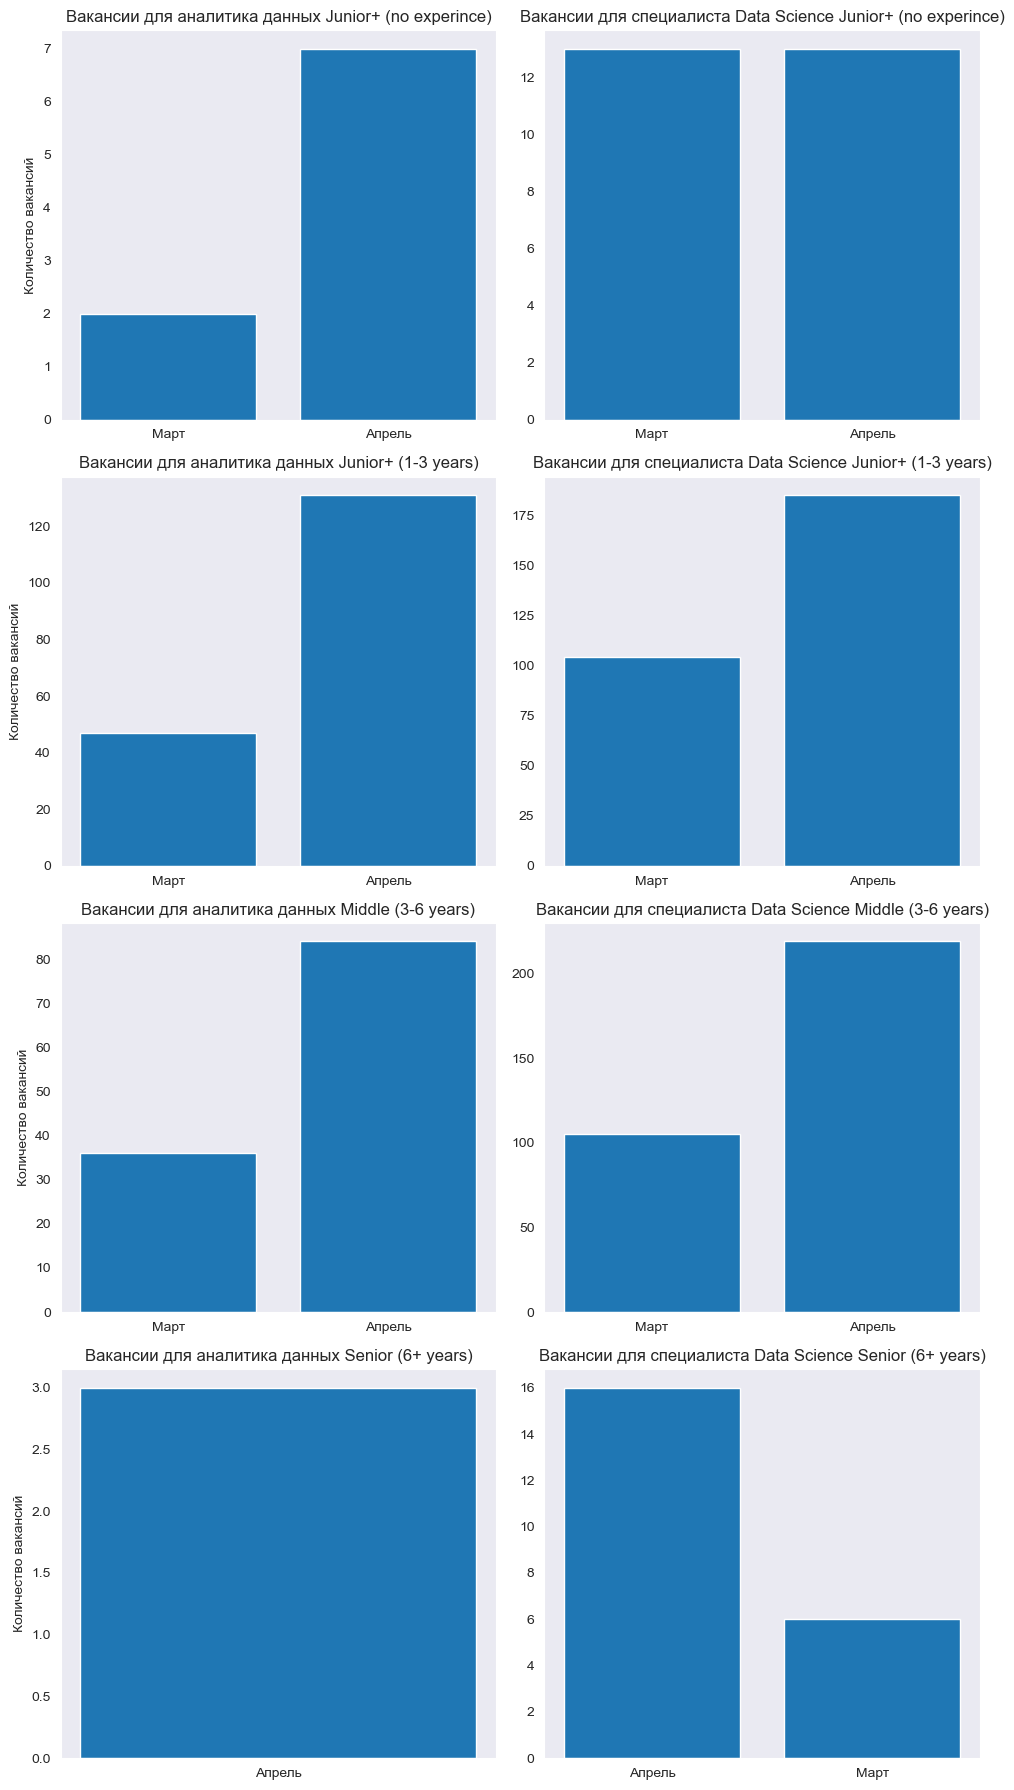

In [2559]:
plt.figure(figsize=(10, 18))

plt.subplot(4, 2, 1)
plt.bar(month_jun['Месяц'], month_jun['Количество вакансий для Аналитика данных'])
plt.title('Вакансии для аналитика данных Junior+ (no experince)')
plt.xlabel('')
plt.ylabel('Количество вакансий')

plt.subplot(4, 2, 2)
plt.bar(month_jun['Месяц'], month_jun['Количество вакансий для Data Science'])
plt.title('Вакансии для специалиста Data Science Junior+ (no experince)')
plt.xlabel('')
plt.ylabel('')

plt.subplot(4, 2, 3)
plt.bar(month_junior['Месяц'], month_junior['Количество вакансий для Аналитика данных'])
plt.title('Вакансии для аналитика данных Junior+ (1-3 years)')
plt.xlabel('')
plt.ylabel('Количество вакансий')

plt.subplot(4, 2, 4)
plt.bar(month_junior['Месяц'], month_junior['Количество вакансий для Data Science'])
plt.title('Вакансии для специалиста Data Science Junior+ (1-3 years)')
plt.xlabel('')
plt.ylabel('')

plt.subplot(4, 2, 5)
plt.bar(month_Middle['Месяц'], month_Middle['Количество вакансий для Аналитика данных'])
plt.title('Вакансии для аналитика данных Middle (3-6 years)')
plt.xlabel('')
plt.ylabel('Количество вакансий')

plt.subplot(4, 2, 6)
plt.bar(month_Middle['Месяц'], month_Middle['Количество вакансий для Data Science'])
plt.title('Вакансии для специалиста Data Science Middle (3-6 years)')
plt.xlabel('')
plt.ylabel('')

plt.subplot(4, 2, 7)
plt.bar(month_Senior['Месяц'], month_Senior['Количество вакансий для Аналитика данных'])
plt.title('Вакансии для аналитика данных Senior (6+ years)')
plt.xlabel('')
plt.ylabel('Количество вакансий')

plt.subplot(4, 2, 8)
plt.bar(month_Senior['Месяц'], month_Senior['Количество вакансий для Data Science'])
plt.title('Вакансии для специалиста Data Science Senior (6+ years)')
plt.xlabel('')
plt.ylabel('')

plt.tight_layout()
plt.show()

#### Количество вакансий Junior, Junior+, Middle  и  Senior увеличивается.

## 4. Формулирование выводов .

#### В вакансиях для Аналитиков данных и специалистов по Data Science больше сходства, чем различий. Но некоторые мы все же нашли.По количеству вакансий у Аналитиков данных  их больше для  Junior с опытом работы, у специалистов по Data Science для Middle.Среди важных hard skils для аналитиков python.У специалистов по Data Science  больше данных для анализа и можно выделить несколько  hard skils -  python,  pandas,	machine learning.Soft skils для аналитиков - это аналитическое мышление, для специалистов по Data Science - документация.В разбивке по работодателям больше данных для специалистов  по Data Science. Среди них крупные банки, маркетплейсы,  рекрутинговые агентства, консалтинговые агенства. Данные о зарплате не указаны в 92% объявлений для всех специалистов.Количество вакансий для специалистов по Data Science  заметно выросло для Junior с опытом работы, Middle, для Senior видим снижение. Для аналитиков так же растет число вакансий  для Junior с опытом работы, Middle, для Senior вакансии в марте отсутствуют.
